<H2> Project 2  - Predicting players rating </H2>
<H4> In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc. </H4>

<H4> Importing Libraries </H4>

In [0]:
!pip install -U -q PyDrive

In [0]:
import sqlite3
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
import keras
import psutil
import pandas as pd
import tensorflow as tf
from google.colab import auth
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

Using TensorFlow backend.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#https://drive.google.com/open?id=1Y1CsMf2waM2XnjrX_OKK3zCRHSiNfkfI

In [0]:
file1 = drive.CreateFile({'id':'1Y1CsMf2waM2XnjrX_OKK3zCRHSiNfkfI'})
file1.GetContentFile('database.sqlite')

In [0]:
!ls

adc.json  database.sqlite  database.sqlite.zip	sample_data


<H2> The ultimate Soccer database for data analysis and machine learning </H2>

<H3> The dataset we are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016 </H3>

In [0]:
#Read Data from the Database into pandas
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [0]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [0]:
df.shape

(183978, 42)

In [0]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [0]:
df.dropna(inplace=True)

In [0]:
df["overall_rating"].max()

94.0

In [0]:
df.shape

(180354, 42)

In [0]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

<H2> From the above list of columns, dependent variable is "overall_rating" </H2>

In [0]:
# let us describe the dependent variable column
df['overall_rating'].describe()

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

<H2> Looks like it is continous variable. So we need to use Linear Regression model</H2>
<H4> We need to clean all these columns and check the columns which are categorical, the First three columns are Id, we need to drop them </H4>

In [0]:
df.drop("id",axis = 1,inplace=True)
df.drop("player_fifa_api_id",axis = 1,inplace=True)
df.drop("player_api_id",axis = 1,inplace=True)

In [0]:
cols = list(df.columns)

In [0]:
cols = cols[1:]  # Ignore the data column and we will build the histogram for all the other columns for visualising the data

In [0]:
len(cols)

38

In [0]:
df1= df.sample(frac=0.1)

In [0]:
df1.shape

(18035, 39)

<H2> Visualization of Data </H2>

<H3> As there is some system constrainst, we are visualizing the data for a sample data(df1). </H3>

<H3> Histograms of all the columns </H3>

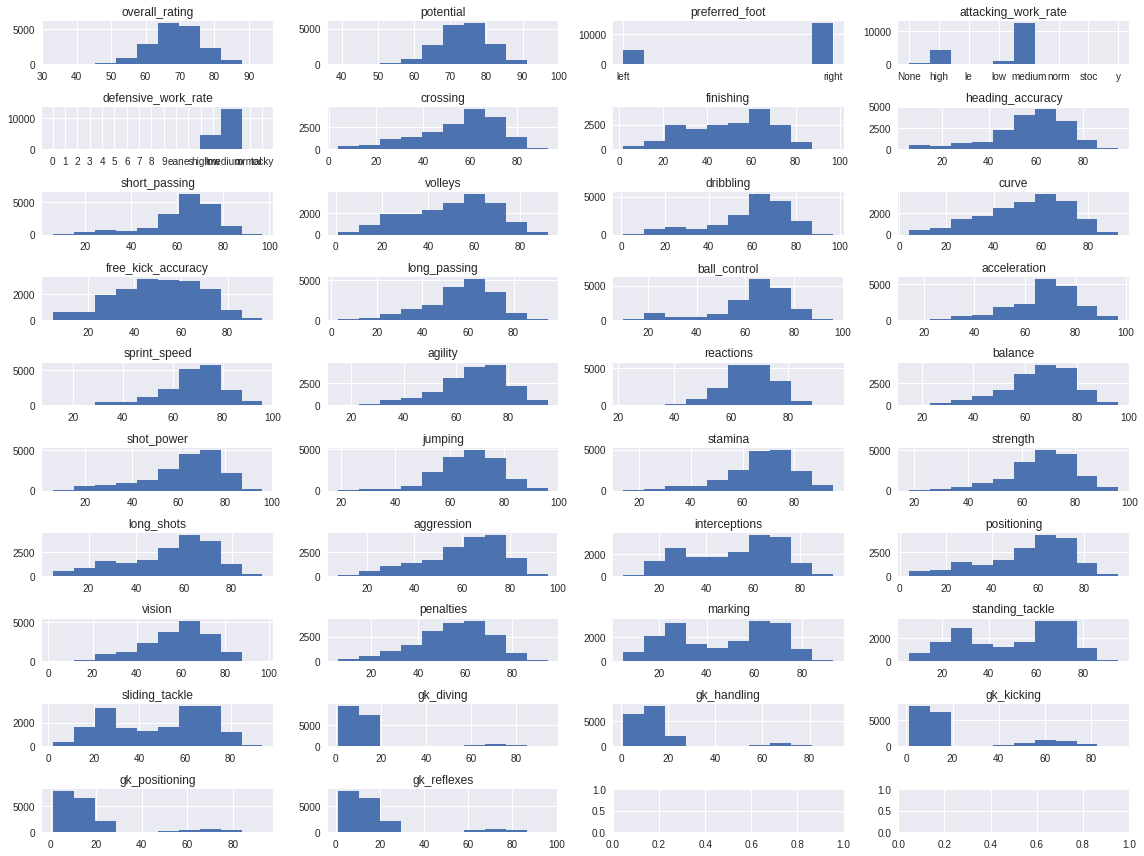

In [0]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < 38:
        ax.hist(df1[cols[i]])
        ax.set_title(cols[i])
plt.tight_layout()

<H3> Scatter plot against Overall rating with all the individual columns </H3>

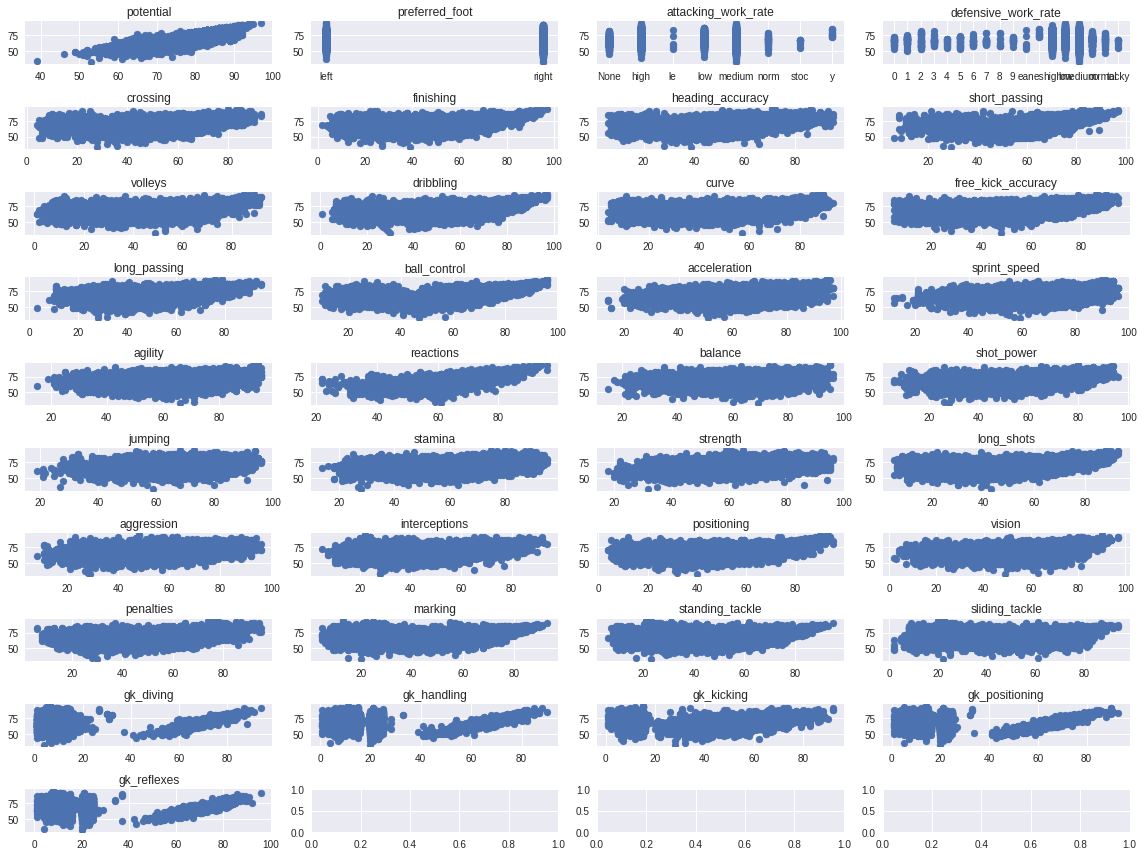

In [0]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < 37:
        ax.scatter(df1[cols[i+1]], df1[cols[0]])
        ax.set_title(cols[i+1])
plt.tight_layout()

<H2> From the above scatter plot, we can identiy three categorical columns -preferred_foot, attacking_work_rate,defensive_work_rate </H2>

In [0]:
df.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [0]:
# We need to convert the date columns to padas date time column
df.loc[:, "new_date"] = df["date"].apply(pd.to_datetime)

In [0]:
# from date we get three new columns, these three columns month, year and day woould be new columns and they are also categorical columns
df.loc[:, "month"] = df["new_date"].apply(lambda x: x.month)
df.loc[:, "year"] = df["new_date"].apply(lambda x: x.year)
df.loc[:, "day"] = df["new_date"].apply(lambda x: x.day)

In [0]:
df["year"].unique()

array([2016, 2015, 2007, 2014, 2013, 2012, 2011, 2010, 2009, 2008])

In [0]:
# add all the categorical columns into cat_cols
cat_cols = ["preferred_foot","attacking_work_rate", "defensive_work_rate","year","month","day"]

In [0]:
df =df.drop("date",axis = 1)
df =df.drop("new_date",axis = 1)

In [0]:
# looping all the categorical columns, creating the dummy columns for categorical columns and dropping the original columns 
# and join the dummy columns to the dataframe.
for col in cat_cols:
    dummies = pd.get_dummies(df[col],prefix =col)
    df = df.join(dummies)
    df=df.drop(col, axis = 1)

In [0]:
df.shape

(180354, 116)

In [0]:
df.dropna(inplace=True)

<H2> The data set is ready for model building
We need to seperate out X and y</H2>

In [0]:
y=df.pop("overall_rating")  # Assign the dependent variable to y variable removing from the dataframe df.
X = df # X will be all the other columns in the dataframe

<H2>Train and test data split </H2>

In [0]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.2)

In [0]:
train_x.shape

(144283, 115)

In [0]:
test_x.shape

(36071, 115)

In [0]:
train_y.shape

(144283,)

In [0]:
test_y.shape

(36071,)

<H3> Linear Regression Model </H3>

In [0]:
lm=LinearRegression()

<H3> Build the model with the Training set </H3>

In [0]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
train_pred = lm.predict(train_x)

In [0]:
# check the mean squared error to find the deviation of the prediction from the actual on the train set
np.sqrt(mean_squared_error(train_y, train_pred))

2.691109599346742

In [0]:
test_pred = lm.predict(test_x)

In [0]:
# check the mean squared error to find the deviation of the prediction from the actual on the train set
np.sqrt(mean_squared_error(test_y, test_pred))


2.6942540056687663

<H3> 2.6975259191547307 is the error we are getting for test and predict. For the min of 33 to max 94 overall rating. This much  of error is acceptable</H3>

<H3> Cross Validation </H3>

In [0]:
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores, scores.mean()

(array([-7.44256819, -7.10106665, -7.1964293 , -7.29567788, -7.17236284,
        -7.57297055, -7.1520984 , -7.34232439, -7.48982496, -7.22300491]),
 -7.298832806459032)

In [0]:
np.sqrt(scores.mean() * -1)

2.7016352097311422

<H3> Even with Cross validation also, the error we are getting is 2.7016352097311422 which is almost same as the earlier mean_squared_error </H3>
